# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [14]:
df = pd.read_csv("Credit Risk Benchmark Dataset.csv") 

In [15]:
print("Пропущенные значения:\n", df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)

Пропущенные значения:
 rev_util       0
age            0
late_30_59     0
debt_ratio     0
monthly_inc    0
open_credit    0
late_90        0
real_estate    0
late_60_89     0
dependents     0
dlq_2yrs       0
dtype: int64


In [16]:
target = 'dlq_2yrs'
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

In [17]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print("=== Матрица ошибок ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Отчет о классификации ===")
print(classification_report(y_test, y_pred))

=== Матрица ошибок ===
[[3309  870]
 [1040 3138]]

=== Отчет о классификации ===
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      4179
           1       0.78      0.75      0.77      4178

    accuracy                           0.77      8357
   macro avg       0.77      0.77      0.77      8357
weighted avg       0.77      0.77      0.77      8357



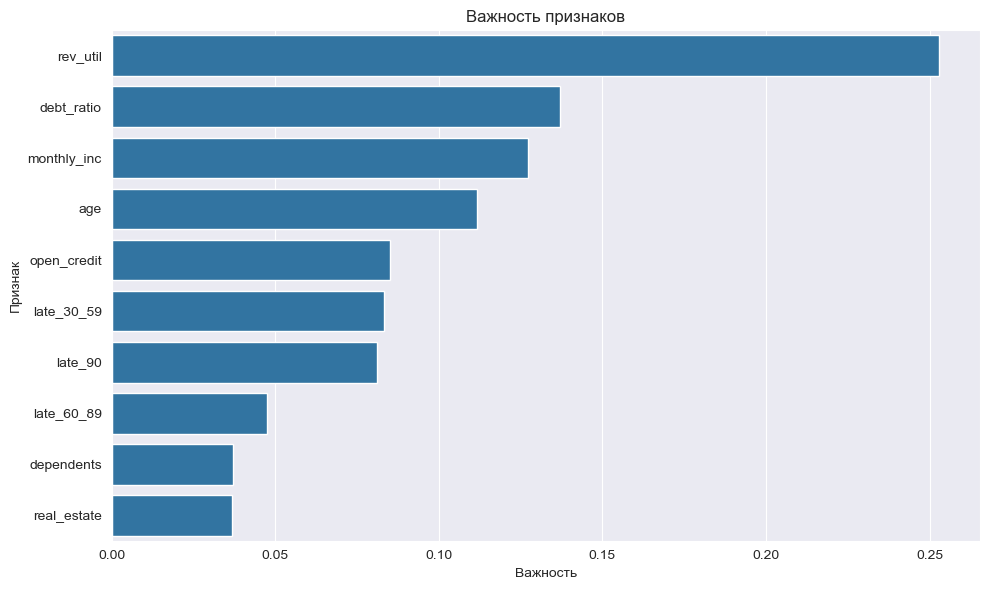

In [19]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': importances
}).sort_values(by='Важность', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Важность', y='Признак', data=feature_importance_df)
plt.title('Важность признаков')
plt.tight_layout()
plt.show()